<a href="https://colab.research.google.com/github/Reign2121/Mining-project2/blob/main/%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D_%EA%B3%B5%EB%A6%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

군집분석에는 여러가지 종류가 있습니다!

크게 두 가지로 보통 나누는데, 계층적과 비계층적 군집분석이 바로 그것입니다.

계층적 군집분석은 주로 덴드로그램으로 만들어서 직관적으로 분석을 할 수 있습니다.

그런데 저는 여기서 비계층적 군집분석에서 대표적으로 많이 쓰이는 k-means 기법을 적용하였습니다.

k-means 클러스터링은 계산량이 적고 복잡하지 않기 때문에 대용량 데이터에 이용하기 적합합니다.

또한, k, 즉, 군집의 수를 지정하면서 적절한 분류지점을 직접 찾아볼 수 있다는 장점이 있습니다. (k의 수에 따라 속하는 군집이 달라지기에 유의해야 합니다.)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
G = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab/머신러닝 입문/Data/공릉동_상권분석_최최종_.csv",encoding = 'cp949')
G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   서비스_업종_코드_명   506 non-null    object
 1   분기당_매출_금액     506 non-null    int64 
 2   분기당_매출_건수     506 non-null    int64 
 3   남성_매출_비율      506 non-null    int64 
 4   여성_매출_비율      506 non-null    int64 
 5   연령대_10_매출_비율  506 non-null    int64 
 6   연령대_20_매출_비율  506 non-null    int64 
 7   연령대_30_매출_비율  506 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 31.8+ KB


In [ ]:
G_store = G.groupby(by="서비스_업종_코드_명")
G["서비스_업종_코드_명"].value_counts()
G = pd.get_dummies(G)
G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   분기당_매출_금액            506 non-null    int64
 1   분기당_매출_건수            506 non-null    int64
 2   남성_매출_비율             506 non-null    int64
 3   여성_매출_비율             506 non-null    int64
 4   연령대_10_매출_비율         506 non-null    int64
 5   연령대_20_매출_비율         506 non-null    int64
 6   연령대_30_매출_비율         506 non-null    int64
 7   서비스_업종_코드_명_농수산물     506 non-null    uint8
 8   서비스_업종_코드_명_마트/편의점   506 non-null    uint8
 9   서비스_업종_코드_명_미용       506 non-null    uint8
 10  서비스_업종_코드_명_생활       506 non-null    uint8
 11  서비스_업종_코드_명_서적/문구    506 non-null    uint8
 12  서비스_업종_코드_명_스포츠      506 non-null    uint8
 13  서비스_업종_코드_명_여가       506 non-null    uint8
 14  서비스_업종_코드_명_음식점      506 non-null    uint8
 15  서비스_업종_코드_명_의류/신발    506 non-null    uint8
 16  서비스_업종_코드_명_의원       506 n

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
G_drop = G.iloc[:,:]
G_drop = G_drop.drop('서비스_업종_코드_명_의원', axis = 1)
G_drop = G_drop.drop('서비스_업종_코드_명_생활', axis = 1)
G_drop = G_drop.drop('연령대_10_매출_비율', axis = 1)

display(G_drop.head())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(G_drop)
scaled_data

,분기당_매출_금액,분기당_매출_건수,남성_매출_비율,여성_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,서비스_업종_코드_명_농수산물,서비스_업종_코드_명_마트/편의점,서비스_업종_코드_명_미용,서비스_업종_코드_명_서적/문구,서비스_업종_코드_명_스포츠,서비스_업종_코드_명_여가,서비스_업종_코드_명_음식점,서비스_업종_코드_명_의류/신발,서비스_업종_코드_명_제과/음료,서비스_업종_코드_명_학원,서비스_업종_코드_명_호프-간이주점
0,8466933897,273671,64,36,11,18,0,0,0,0,0,0,1,0,0,0,0
1,362971950,17919,68,32,11,21,0,0,0,0,0,0,1,0,0,0,0
2,165879127,3816,61,39,16,24,0,0,0,0,0,0,1,0,0,0,0
3,138237410,7856,61,39,16,25,0,0,0,0,0,0,1,0,0,0,0
4,286257390,33397,43,57,16,21,0,0,0,0,0,0,0,0,1,0,0


array([[ 4.43477222,  2.30619882,  0.58896529, ..., -0.2231424 ,
        -0.25982792, -0.1558573 ],
       [-0.28991854, -0.26947189,  0.77572164, ..., -0.2231424 ,
        -0.25982792, -0.1558573 ],
       [-0.40482562, -0.41150278,  0.44889803, ..., -0.2231424 ,
        -0.25982792, -0.1558573 ],
       ...,
       [-0.46617407, -0.44729501, -0.57826186, ..., -0.2231424 ,
        -0.25982792, -0.1558573 ],
       [-0.45763   , -0.44838267,  1.70950336, ..., -0.2231424 ,
        -0.25982792, -0.1558573 ],
       [-0.39452043, -0.43364884, -2.39913623, ..., -0.2231424 ,
        -0.25982792, -0.1558573 ]])


* 미션1. 각 데이터별 군집분석된 소속 cluster를 도출하시오.
* 미션2. 각 cluster별 중심값을 표준화되기 이전 형태로 도출하고 군집별 특징을 파악하시오.
* 미션3. n_cluster를 1~10까지 바꿔가면서, inertia기준 적절한 n_cluster를 찾으시오.


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state = 0) 
km.fit(scaled_data)   
cluster_result = km.predict(scaled_data) 
print("군집번호:", cluster_result)
print(km.labels_)
print(np.unique(cluster_result, return_counts = True)) 

군집번호: [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 2 0 2 0 1 1 1 1 0 2 0 0 0 1 1 1 1 1 1 0
 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 2 0 2 0 1 1 1 1 0 2
 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 2 1 1
 1 2 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 2 0 2 0 1 1 0
 1 1 2 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 2 0 2 0 1 1 0 1 1 2 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 2 2 1 1 0 2 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 2 0 2 0 1 1 0 1 0 2 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 2 0 2 0 1 1 0 1 0 2 0 0 1 1 1 1 1
 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 2 2 1 1 0 2 0 0 1 1
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 2 0 0 1 1 0 1 0 2 0 0 0 0
 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 2 0 2
 1 1 0 1 0 2 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 2 2 0 1 1 

In [ ]:
G["cluster_#"] = cluster_result
G.head(10) #10개만 보여주기  
G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   분기당_매출_금액            506 non-null    int64
 1   분기당_매출_건수            506 non-null    int64
 2   남성_매출_비율             506 non-null    int64
 3   여성_매출_비율             506 non-null    int64
 4   연령대_10_매출_비율         506 non-null    int64
 5   연령대_20_매출_비율         506 non-null    int64
 6   연령대_30_매출_비율         506 non-null    int64
 7   서비스_업종_코드_명_농수산물     506 non-null    uint8
 8   서비스_업종_코드_명_마트/편의점   506 non-null    uint8
 9   서비스_업종_코드_명_미용       506 non-null    uint8
 10  서비스_업종_코드_명_생활       506 non-null    uint8
 11  서비스_업종_코드_명_서적/문구    506 non-null    uint8
 12  서비스_업종_코드_명_스포츠      506 non-null    uint8
 13  서비스_업종_코드_명_여가       506 non-null    uint8
 14  서비스_업종_코드_명_음식점      506 non-null    uint8
 15  서비스_업종_코드_명_의류/신발    506 non-null    uint8
 16  서비스_업종_코드_명_의원       506 n

In [ ]:
centroid = km.cluster_centers_
Original_centroid = scaler.inverse_transform(centroid)
print("원본 군집중심: \n", Original_centroid) #표준화 이전 형태로 변환 특징 도출
centroid_df = pd.DataFrame(Original_centroid, columns = G_drop.columns)
df_mean = G_drop.mean()
centroid_df.loc['Average']=df_mean 
display(centroid_df) #군집 중심 평균값 반환
pd.options.display.float_format = '{:.5f}'.format

원본 군집중심: 
 [[ 1.11188600e+09  6.91689003e+04  5.93058419e+01  4.08041237e+01
   1.73024055e+01  1.86357388e+01  6.87285223e-03  8.24742268e-02
   3.09278351e-02  1.03092784e-02  1.09965636e-01 -8.32667268e-17
   2.88659794e-01  1.17961196e-16  8.24742268e-02 -1.38777878e-17
   4.12371134e-02]
 [ 5.85475311e+08  9.09371111e+03  3.20055556e+01  6.80666667e+01
   9.10555556e+00  1.26611111e+01  1.66666667e-01  5.55111512e-17
   2.16666667e-01  7.77777778e-02  9.71445147e-17 -8.32667268e-17
   5.55555556e-03  1.05555556e-01  6.24500451e-17  1.77777778e-01
  -3.46944695e-18]
 [ 1.81214957e+08  2.40338857e+04  8.52000000e+01  1.48857143e+01
   3.20000000e+01  1.21142857e+01  1.38777878e-17  1.38777878e-17
  -2.77555756e-17 -6.93889390e-18  0.00000000e+00  1.00000000e+00
   5.55111512e-17  0.00000000e+00  6.93889390e-18  0.00000000e+00
   0.00000000e+00]]


,분기당_매출_금액,분기당_매출_건수,남성_매출_비율,여성_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,서비스_업종_코드_명_농수산물,서비스_업종_코드_명_마트/편의점,서비스_업종_코드_명_미용,서비스_업종_코드_명_서적/문구,서비스_업종_코드_명_스포츠,서비스_업종_코드_명_여가,서비스_업종_코드_명_음식점,서비스_업종_코드_명_의류/신발,서비스_업종_코드_명_제과/음료,서비스_업종_코드_명_학원,서비스_업종_코드_명_호프-간이주점
0,1111886002.05498,69168.90034,59.30584,40.80412,17.30241,18.63574,0.00687,0.08247,0.03093,0.01031,0.10997,-0.00000,0.28866,0.00000,0.08247,-0.00000,0.04124
1,585475311.00556,9093.71111,32.00556,68.06667,9.10556,12.66111,0.16667,0.00000,0.21667,0.07778,0.00000,-0.00000,0.00556,0.10556,0.00000,0.17778,-0.00000
2,181214956.88571,24033.88571,85.20000,14.88571,32.00000,12.11429,0.00000,0.00000,-0.00000,-0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Average,860250802.50988,44676.29249,51.38538,48.70949,15.40316,16.05929,0.06324,0.04743,0.09486,0.03360,0.06324,0.06917,0.16798,0.03755,0.04743,0.06324,0.02372


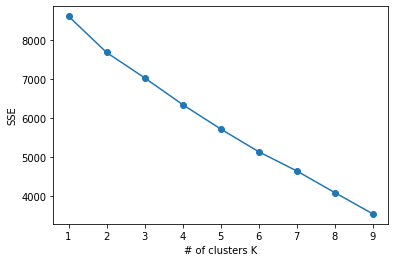

In [ ]:
k_num = range(1,10)
inertias = []
#최적의 k 수 찾기
for k in k_num: 
  km_model = KMeans(n_clusters = k, random_state = 0)
  km_model.fit(scaled_data)
  inertias.append(km_model.inertia_) 
import matplotlib.pyplot as plt

plt.plot(k_num, inertias,'-o')
plt.xlabel("# of clusters K")
plt.ylabel("SSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_

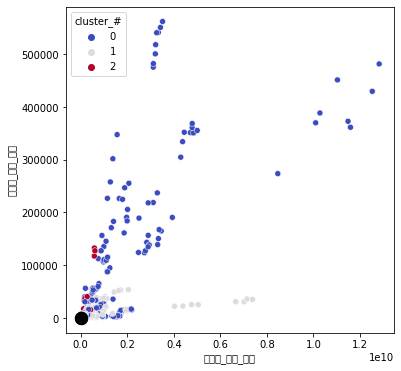

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20, 6)) 
X = G
plt.subplot(131) 
sns.scatterplot(x=G.iloc[:,0], y=X.iloc[:,1], data=G, hue=G['cluster_#'], palette='coolwarm')
plt.scatter(centroid[:,0], centroid[:,3], c='black', alpha=0.8, s=150)

실데이터임을 감안하더라도, 썩 마음에 드는 결과는 아닙니다..

군집별로 차이를 보이는 지점은 도출해낼 수 있을 것 같네요